## Author

**Full Name: Yiğit Yalın**

**Student ID: 22002178**

### Import the required libraries

In [1]:
from enum import IntEnum
from operator import itemgetter
from tabulate import tabulate

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

np.set_printoptions(precision=5)

# Question 1

## Enumerate the states

In [2]:
class States(IntEnum):
    ANKARA = 0
    POLATLI = 1
    BOLU = 2
    SAKARYA = 3
    ESKISEHIR = 4
    IZMIT = 5
    GEMLIK = 6
    ISTANBUL = 7
    
    def __str__(self):
        return self.name

## Enumerate the actions

In [3]:
class Actions(IntEnum):
    UP = 0
    DOWN = 1

## Construct the graph

In [4]:
G = nx.DiGraph()

edges = [
    (States.ANKARA, States.POLATLI, dict(weight=-3, action=Actions.UP)),
    (States.ANKARA, States.BOLU, dict(weight=-1, action=Actions.DOWN)),
    (States.POLATLI, States.SAKARYA, dict(weight=-2, action=Actions.UP)),
    (States.POLATLI, States.ESKISEHIR, dict(weight=-4, action=Actions.DOWN)),
    (States.BOLU, States.SAKARYA, dict(weight=-3, action=Actions.UP)),
    (States.BOLU, States.ESKISEHIR, dict(weight=-5, action=Actions.DOWN)),
    (States.SAKARYA, States.IZMIT, dict(weight=-4, action=Actions.UP)),
    (States.SAKARYA, States.GEMLIK, dict(weight=-5, action=Actions.DOWN)),
    (States.ESKISEHIR, States.IZMIT, dict(weight=-5, action=Actions.UP)),
    (States.ESKISEHIR, States.GEMLIK, dict(weight=-6, action=Actions.DOWN)),
    (States.IZMIT, States.ISTANBUL, dict(weight=-6, action=Actions.DOWN)),
    (States.GEMLIK, States.ISTANBUL, dict(weight=-7, action=Actions.UP))
]

G.add_edges_from(edges)

## Draw the graph

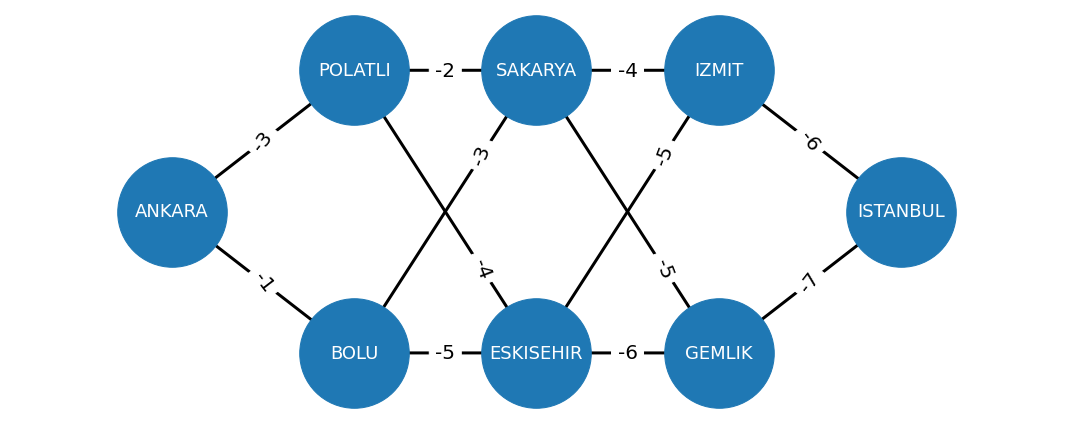

In [5]:
positions = {
    States.ANKARA: np.array([0, 0]),
    States.POLATLI: np.array([2, 1]),
    States.BOLU: np.array([2, -1]),
    States.SAKARYA: np.array([4, 1]),
    States.ESKISEHIR: np.array([4, -1]),
    States.IZMIT: np.array([6, 1]),
    States.GEMLIK: np.array([6, -1]),
    States.ISTANBUL: np.array([8, 0]),
}

nx.draw_networkx_nodes(G, positions, node_size=12000)
nx.draw_networkx_edges(G, positions, width=3, arrowsize=40, arrowstyle="-|>")

nx.draw_networkx_labels(G, positions, font_size=18, font_color="white")

edge_labels = nx.get_edge_attributes(G, "weight")
edge_labels_to_fix = {
    edge: edge_labels.pop(edge)
    for edge in [
        (States.BOLU, States.SAKARYA),
        (States.POLATLI, States.ESKISEHIR),
        (States.ESKISEHIR, States.IZMIT),
        (States.SAKARYA, States.GEMLIK)
    ]
}
nx.draw_networkx_edge_labels(G, positions, edge_labels, font_size=20)
nx.draw_networkx_edge_labels(G, positions, edge_labels_to_fix, 
                             font_size=20, label_pos=0.3)

ax = plt.gca()
ax.margins(0.16)

fig = ax.get_figure()
fig.set_size_inches(15, 6)

plt.axis("off")
plt.tight_layout()

plt.show()

## Construct the one-step probability matrices for each action

In [6]:
P_up = np.zeros((len(States), len(States)))

for u in States:
    edges = G.edges(u, data=True)
    if len(edges) < len(Actions):
        P_up[u][States.ISTANBUL] = 1
    else:
        for _, v, data in G.edges(u, data=True):
            if data.get("action") == Actions.UP:
                P_up[u][v] = 1

print(P_up)

[[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [7]:
P_down = np.zeros((len(States), len(States)))

for u in States:
    edges = G.edges(u, data=True)
    if len(edges) < len(Actions):
        P_down[u][States.ISTANBUL] = 1
    else:
        for _, v, data in G.edges(u, data=True):
            if data.get("action") == Actions.DOWN:
                P_down[u][v] = 1

print(P_down)

[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [8]:
P = np.concatenate([P_up[np.newaxis, ...], P_down[np.newaxis, ...]], axis=0)

print('One-step transition matrix for the action "UP":', P[Actions.UP], '', 
      'One-step transition matrix for the action "DOWN":', P[Actions.DOWN], sep="\n")

One-step transition matrix for the action "UP":
[[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]

One-step transition matrix for the action "DOWN":
[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


## Construct the reward vector for each action

In [9]:
R_up = np.where(P_up == 0, 0, nx.to_numpy_array(G)).sum(axis=1)

print(R_up)

[-3. -2. -3. -4. -5. -6. -7.  0.]


In [10]:
R_down = np.where(P_down == 0, 0, nx.to_numpy_array(G)).sum(axis=1)

print(R_down)

[-1. -4. -5. -5. -6. -6. -7.  0.]


In [11]:
R = np.concatenate([R_up[np.newaxis, ...], R_down[np.newaxis, ...]], axis=0)

print('Reward vector for the action "UP":', R[Actions.UP], '', 
      'Reward vector for the action "DOWN":', R[Actions.DOWN], sep="\n")

Reward vector for the action "UP":
[-3. -2. -3. -4. -5. -6. -7.  0.]

Reward vector for the action "DOWN":
[-1. -4. -5. -5. -6. -6. -7.  0.]


## Construct the probability matrix of actions for the given policy 

In [12]:
get_edge_data = itemgetter(2)

def get_action_probability(state, action):
    for edge in G.edges(state, data=True):
        if get_edge_data(edge).get("action") == action:
            return 1 / len(G.edges(state))
    return 0

In [13]:
pi = np.array([
    [get_action_probability(state, action) for state in States]
    for action in Actions
])

print(pi)

[[0.5 0.5 0.5 0.5 0.5 0.  1.  0. ]
 [0.5 0.5 0.5 0.5 0.5 1.  0.  0. ]]


## Construct $P^\pi$ and $R^\pi$ vectors

In [14]:
alpha = 0.5 # probability to choose action UP

P_pi = alpha * P[Actions.UP] + (1 - alpha) * P[Actions.DOWN]

print(P_pi)

[[0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  0.  0.  1. ]]


In [15]:
R_pi = alpha * R[Actions.UP] + (1 - alpha) * R[Actions.DOWN]

print(R_pi)

[-2.  -3.  -4.  -4.5 -5.5 -6.  -7.   0. ]


## Evaluate the policy by finding the state values

The iterative policy evaluation algorithm is given as follows:

$$v_{k+1}(s) = \sum \limits_{a \in A} \pi(a | s)(R_s^a + \gamma \sum \limits_{s^\prime \in S} P^{a}_{ss^\prime} v_k(s^\prime))$$

An vectorized version of this algorithm can be written as follows:

$$v_{k+1} = R^\pi + \gamma P^\pi v_k$$

This equation can be solved as follows:

$$v = (I - \gamma P^\pi)^{-1}R^\pi$$

**This code piece evaluates the policy using non-vectorized implementation of the iterative policy evaluation algorithm.**

In [16]:
gamma = 0.9

v = np.zeros(len(States))

for _ in range(1000):
    v_new = np.zeros(len(States))
    for state in States:
        for action in Actions:
            s = np.sum([
                P[action][state][next_state] * v[next_state]
                for next_state in States
            ])

            reward = R[action][state]

            v_new[state] += pi[action][state] * (reward + gamma * s)

    v = v_new

print(tabulate(zip(map(lambda state: state.name, States), v), 
               headers=["State", "Value"], tablefmt="fancy_grid"))

╒═══════════╤══════════╕
│ State     │    Value │
╞═══════════╪══════════╡
│ ANKARA    │ -13.9385 │
├───────────┼──────────┤
│ POLATLI   │ -12.765  │
├───────────┼──────────┤
│ BOLU      │ -13.765  │
├───────────┼──────────┤
│ SAKARYA   │ -10.35   │
├───────────┼──────────┤
│ ESKISEHIR │ -11.35   │
├───────────┼──────────┤
│ IZMIT     │  -6      │
├───────────┼──────────┤
│ GEMLIK    │  -7      │
├───────────┼──────────┤
│ ISTANBUL  │   0      │
╘═══════════╧══════════╛


**This code piece evaluates the policy by solving the system of linear equations (by matrix inversion).**

In [17]:
gamma = 0.9
v = np.linalg.inv(np.identity(len(States)) - gamma * P_pi) @ R_pi

print(tabulate(zip(map(lambda state: state.name, States), v), 
               headers=["State", "Value"], tablefmt="fancy_grid"))

╒═══════════╤══════════╕
│ State     │    Value │
╞═══════════╪══════════╡
│ ANKARA    │ -13.9385 │
├───────────┼──────────┤
│ POLATLI   │ -12.765  │
├───────────┼──────────┤
│ BOLU      │ -13.765  │
├───────────┼──────────┤
│ SAKARYA   │ -10.35   │
├───────────┼──────────┤
│ ESKISEHIR │ -11.35   │
├───────────┼──────────┤
│ IZMIT     │  -6      │
├───────────┼──────────┤
│ GEMLIK    │  -7      │
├───────────┼──────────┤
│ ISTANBUL  │   0      │
╘═══════════╧══════════╛


## Enumerate all deterministic policies using the graph

In [18]:
paths = [
    path for path in nx.all_simple_paths(G, States.ANKARA, States.ISTANBUL)
]


def get_path_representation(path):
    return " -> ".join(state.name for state in path)


def get_path_satisfaction(path):
    return nx.classes.function.path_weight(G, path, "weight")


representations = [get_path_representation(path) for path in paths]
satisfactions = np.array([get_path_satisfaction(path) for path in paths])
best_path = np.argmax(satisfactions)

print(tabulate(
    zip((index + 1 for index in range(len(paths))), 
        representations, satisfactions),
    headers=["#", "Path", "Satisfaction"], tablefmt="fancy_grid")
)

print(f"\nThe best path is #{best_path + 1}")

╒═════╤══════════════════════════════════════════════════════╤════════════════╕
│   # │ Path                                                 │   Satisfaction │
╞═════╪══════════════════════════════════════════════════════╪════════════════╡
│   1 │ ANKARA -> POLATLI -> SAKARYA -> IZMIT -> ISTANBUL    │            -15 │
├─────┼──────────────────────────────────────────────────────┼────────────────┤
│   2 │ ANKARA -> POLATLI -> SAKARYA -> GEMLIK -> ISTANBUL   │            -17 │
├─────┼──────────────────────────────────────────────────────┼────────────────┤
│   3 │ ANKARA -> POLATLI -> ESKISEHIR -> IZMIT -> ISTANBUL  │            -18 │
├─────┼──────────────────────────────────────────────────────┼────────────────┤
│   4 │ ANKARA -> POLATLI -> ESKISEHIR -> GEMLIK -> ISTANBUL │            -20 │
├─────┼──────────────────────────────────────────────────────┼────────────────┤
│   5 │ ANKARA -> BOLU -> SAKARYA -> IZMIT -> ISTANBUL       │            -14 │
├─────┼─────────────────────────────────

**Note that we can also find the best paths using Dijkstra's algorithm and Bellman-Ford algorithm**

In [19]:
print("The best path: " + get_path_representation(
    nx.algorithms.dijkstra_path(G, States.ANKARA, States.ISTANBUL,
                                weight=lambda u, v, d: -d["weight"])
))

The best path: ANKARA -> BOLU -> SAKARYA -> IZMIT -> ISTANBUL


In [20]:
print("The best path: " + get_path_representation(
    nx.algorithms.bellman_ford_path(G, States.ANKARA, States.ISTANBUL,
                                weight=lambda u, v, d: -d["weight"])
))

The best path: ANKARA -> BOLU -> SAKARYA -> IZMIT -> ISTANBUL


## Find the best policy for $\gamma = 1$ using the value iteration algorithm

In [21]:
gamma = 1  # the discount factor is 1
epsilon = 1e-5  # the absolute tolerance is 10^-5
v = np.zeros(len(States))  # initialize values
max_iterations = 10000


for iteration in range(1, max_iterations + 1):
    delta = 0
    for state in States:
        values = np.zeros(len(Actions))
        for action in Actions:
            values[action] += R[action][state]
            s = np.sum([
                P[action][state][next_state] * v[next_state]
                for next_state in States
            ])
            
            values[action] += gamma * s
        
        delta = max(delta, np.abs(values.max() - v[state]))
        v[state] = values.max()
        
    if delta < epsilon:
        break

print(tabulate(zip(map(lambda state: state.name, States), v), 
               headers=["State", "Value"], tablefmt="fancy_grid"))
print(f"\nNumber of iterations to converge: {iteration}")

╒═══════════╤═════════╕
│ State     │   Value │
╞═══════════╪═════════╡
│ ANKARA    │     -14 │
├───────────┼─────────┤
│ POLATLI   │     -12 │
├───────────┼─────────┤
│ BOLU      │     -13 │
├───────────┼─────────┤
│ SAKARYA   │     -10 │
├───────────┼─────────┤
│ ESKISEHIR │     -11 │
├───────────┼─────────┤
│ IZMIT     │      -6 │
├───────────┼─────────┤
│ GEMLIK    │      -7 │
├───────────┼─────────┤
│ ISTANBUL  │       0 │
╘═══════════╧═════════╛

Number of iterations to converge: 5


In [22]:
node_attributes = {
    state: v[state]
    for state in States
}

nx.set_node_attributes(G, node_attributes, "value")

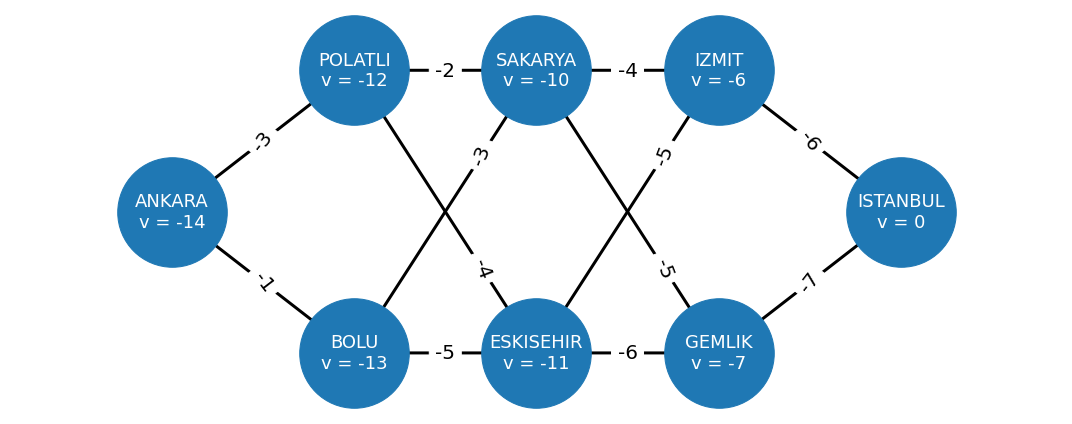

In [23]:
positions = {
    States.ANKARA: np.array([0, 0]),
    States.POLATLI: np.array([2, 1]),
    States.BOLU: np.array([2, -1]),
    States.SAKARYA: np.array([4, 1]),
    States.ESKISEHIR: np.array([4, -1]),
    States.IZMIT: np.array([6, 1]),
    States.GEMLIK: np.array([6, -1]),
    States.ISTANBUL: np.array([8, 0]),
}

nx.draw_networkx_nodes(G, positions, node_size=12000)
nx.draw_networkx_edges(G, positions, width=3, arrowsize=40, arrowstyle="-|>")

node_labels = {
    state: f"{state.name}\nv = {int(v[state])}"
    for state in States
}
nx.draw_networkx_labels(G, positions, labels=node_labels, 
                        font_size=18, font_color="white")

edge_labels = nx.get_edge_attributes(G, "weight")
edge_labels_to_fix = {
    edge: edge_labels.pop(edge)
    for edge in [
        (States.BOLU, States.SAKARYA),
        (States.POLATLI, States.ESKISEHIR),
        (States.ESKISEHIR, States.IZMIT),
        (States.SAKARYA, States.GEMLIK)
    ]
}
nx.draw_networkx_edge_labels(G, positions, edge_labels, font_size=20)
nx.draw_networkx_edge_labels(G, positions, edge_labels_to_fix, 
                             font_size=20, label_pos=0.3)

ax = plt.gca()
ax.margins(0.16)

fig = ax.get_figure()
fig.set_size_inches(15, 6)

plt.axis("off")
plt.tight_layout()

plt.show()

### We can thus get the best possible path (the optimal policy) as follows:

Since we know the state values, for each state, we know what the best possible action is. Then, starting from any state, we can follow the best possible actions that we obtain using the state values in every state to reach the terminal state with the maximum reward (or the minimum cost). 

In other words, if we know the values of  $v^*(s)$ for each s, we can find the best policy by one step lookahead.

This can be better understood following the code below:

In [24]:
def get_best_path(G, departure, destination):
    def get_best_action(state):
        values = nx.get_node_attributes(G, "value")
        best_value = -np.inf
        best_state = None
        for u, v, d in G.edges(state, data=True):
            path_value = d["weight"] + values[v]
            
            if path_value > best_value:
                best_value = path_value
                best_state = v
        
        return States(best_state)
    
    path = []
    current_state = departure
    
    while list(G.successors(current_state)):
        path.append(current_state)
        current_state = get_best_action(current_state)
    
    path.append(current_state)
    
    return path

In [25]:
print(list(map(lambda state: state.name,
               get_best_path(G, States.ANKARA, States.ISTANBUL))))

['ANKARA', 'BOLU', 'SAKARYA', 'IZMIT', 'ISTANBUL']


**Recall that this is the same as the best path we found earlier:**

In [26]:
print(list(map(lambda state: state.name, paths[best_path])))

['ANKARA', 'BOLU', 'SAKARYA', 'IZMIT', 'ISTANBUL']


# Question 2

## Construct the P_xr matrix

In [27]:
P_xr = np.array([
    [3/7, 1/7, 1/7, 1/7, 1/7, 0, 0, 0],
    [6/7, 4/7, 4/7, 5/7, 5/7, 0, 0, 0]
])

print(P_xr)

[[0.42857 0.14286 0.14286 0.14286 0.14286 0.      0.      0.     ]
 [0.85714 0.57143 0.57143 0.71429 0.71429 0.      0.      0.     ]]


## Construct the R_xr matrix

In [28]:
R_xr = np.array([
    [12, 16, 16, 16, 16, 0, 0, 0],
    [6, 10, 10, 8, 8, 0, 0, 0]
])

print(R_xr)

[[12 16 16 16 16  0  0  0]
 [ 6 10 10  8  8  0  0  0]]


## Initialize the policy

In [30]:
pi = np.array([
    np.ones(len(States)),
    np.zeros(len(States))
])

print(pi)

[[1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


## Define the Policy Evaluation function to use in the Policy Iteration algorithm

In [31]:
def evaluate_policy(pi, gamma):
    v = np.zeros(len(States))

    for _ in range(1000):
        v_new = np.zeros(len(States))
        for state in States:
            for action in Actions:
                s = np.sum([
                    P[action][state][next_state] * v[next_state]
                    for next_state in States
                ])

                reward = R[action][state] + R_xr[action][state] * P_xr[action][state]

                v_new[state] += pi[action][state] * (reward + gamma * s)

        v = v_new
    return v

## Find the optimal policy using the Policy Iteration algorithm

In [32]:
gamma = 1  # the discount factor is 1
epsilon = 1e-5  # the absolute tolerance is 10^-5
max_iterations = 10000

print("Initial values:")
print(tabulate(zip(map(lambda s: s.name, States), evaluate_policy(pi, gamma)), 
               headers=["State", "Value"], tablefmt="fancy_grid"))

for iteration in range(1, max_iterations + 1):
    pi_stable = True
    v = evaluate_policy(pi, gamma)
    
    for state in States:
        values = np.zeros(len(Actions))
        for action in Actions:
            values[action] += R[action][state] + R_xr[action][state] * P_xr[action][state]
            s = np.sum([
                P[action][state][next_state] * v[next_state]
                for next_state in States
            ])
            
            values[action] += gamma * s
        
        best_action = values.argmax()
        policy_action = pi.transpose()[state].argmax()
        
        if best_action != policy_action:
            pi_stable = False
        
        pi[..., state] = np.identity(len(Actions))[best_action]
    
    if pi_stable:
        break
        
    print("\nIteration: " + str(iteration))
    print(tabulate(zip(map(lambda s: s.name, States), evaluate_policy(pi, gamma)), 
                   headers=["State", "Value"], tablefmt="fancy_grid"))

Initial values:
╒═══════════╤══════════╕
│ State     │    Value │
╞═══════════╪══════════╡
│ ANKARA    │ -5.28571 │
├───────────┼──────────┤
│ POLATLI   │ -7.42857 │
├───────────┼──────────┤
│ BOLU      │ -8.42857 │
├───────────┼──────────┤
│ SAKARYA   │ -7.71429 │
├───────────┼──────────┤
│ ESKISEHIR │ -8.71429 │
├───────────┼──────────┤
│ IZMIT     │ -6       │
├───────────┼──────────┤
│ GEMLIK    │ -7       │
├───────────┼──────────┤
│ ISTANBUL  │  0       │
╘═══════════╧══════════╛

Iteration: 1
╒═══════════╤══════════╕
│ State     │    Value │
╞═══════════╪══════════╡
│ ANKARA    │ -2.42857 │
├───────────┼──────────┤
│ POLATLI   │ -5.57143 │
├───────────┼──────────┤
│ BOLU      │ -6.57143 │
├───────────┼──────────┤
│ SAKARYA   │ -6.28571 │
├───────────┼──────────┤
│ ESKISEHIR │ -7.28571 │
├───────────┼──────────┤
│ IZMIT     │ -6       │
├───────────┼──────────┤
│ GEMLIK    │ -7       │
├───────────┼──────────┤
│ ISTANBUL  │  0       │
╘═══════════╧══════════╛


### Optimal policy 

**For state Izmit and Gemlik, both actions have the same reward and give the probability 1 to the transition to Istanbul. Thus, any policy will have the same values. Therefore, there are more than one optimal policy, all of which prescribes the actions given in the table below for the other states.**

**The state Istanbul is the terminal state and the process ends when reached.**

**The actions that all the optimal policies prescribe can be found in the following table:**

In [33]:
print(tabulate(zip(map(lambda state: state.name, States), *pi[..., :-3]), 
               headers=["State", "P(Action.UP)", "P(Action.DOWN)"], 
               tablefmt="fancy_grid"))

╒═══════════╤════════════════╤══════════════════╕
│ State     │   P(Action.UP) │   P(Action.DOWN) │
╞═══════════╪════════════════╪══════════════════╡
│ ANKARA    │              0 │                1 │
├───────────┼────────────────┼──────────────────┤
│ POLATLI   │              0 │                1 │
├───────────┼────────────────┼──────────────────┤
│ BOLU      │              0 │                1 │
├───────────┼────────────────┼──────────────────┤
│ SAKARYA   │              0 │                1 │
├───────────┼────────────────┼──────────────────┤
│ ESKISEHIR │              0 │                1 │
╘═══════════╧════════════════╧══════════════════╛


### Optimal values

We will calculate the optimal values for different optimal policies to give some examples the previous discussion. Note that all the policies below have to result in the same (optimal) state values.

First, we will evaluate the policy that is given by the policy iteration algorithm:

In [34]:
print(tabulate(zip(map(lambda state: state.name, States), *pi), 
               headers=["State", "P(Action.UP)", "P(Action.DOWN)"], 
               tablefmt="fancy_grid"))

╒═══════════╤════════════════╤══════════════════╕
│ State     │   P(Action.UP) │   P(Action.DOWN) │
╞═══════════╪════════════════╪══════════════════╡
│ ANKARA    │              0 │                1 │
├───────────┼────────────────┼──────────────────┤
│ POLATLI   │              0 │                1 │
├───────────┼────────────────┼──────────────────┤
│ BOLU      │              0 │                1 │
├───────────┼────────────────┼──────────────────┤
│ SAKARYA   │              0 │                1 │
├───────────┼────────────────┼──────────────────┤
│ ESKISEHIR │              0 │                1 │
├───────────┼────────────────┼──────────────────┤
│ IZMIT     │              1 │                0 │
├───────────┼────────────────┼──────────────────┤
│ GEMLIK    │              1 │                0 │
├───────────┼────────────────┼──────────────────┤
│ ISTANBUL  │              1 │                0 │
╘═══════════╧════════════════╧══════════════════╛


In [35]:
v = evaluate_policy(pi, gamma)

print(tabulate(zip(map(lambda state: state.name, States), v), 
               headers=["State", "Value"], tablefmt="fancy_grid"))

╒═══════════╤══════════╕
│ State     │    Value │
╞═══════════╪══════════╡
│ ANKARA    │ -2.42857 │
├───────────┼──────────┤
│ POLATLI   │ -5.57143 │
├───────────┼──────────┤
│ BOLU      │ -6.57143 │
├───────────┼──────────┤
│ SAKARYA   │ -6.28571 │
├───────────┼──────────┤
│ ESKISEHIR │ -7.28571 │
├───────────┼──────────┤
│ IZMIT     │ -6       │
├───────────┼──────────┤
│ GEMLIK    │ -7       │
├───────────┼──────────┤
│ ISTANBUL  │  0       │
╘═══════════╧══════════╛


Observe that the following policies are also optimal.

In [36]:
def generate_optimal_policy():
    random_probas = [np.random.dirichlet(np.ones((2))).reshape(2, 1) for _ in range(3)]
    return np.concatenate([pi[..., :-3], *random_probas], axis=-1)

for i in range(5):
    print("\n-----------------------------------------------------------")
    print(f"Policy {i + 1}")
    pi = generate_optimal_policy()
    v = evaluate_policy(pi, gamma)
    print(tabulate(zip(map(lambda state: state.name, States), *pi, v), 
                   headers=["State", "P(Action.UP)", "P(Action.DOWN)", "Value"], 
                   tablefmt="fancy_grid"))


-----------------------------------------------------------
Policy 1
╒═══════════╤════════════════╤══════════════════╤══════════╕
│ State     │   P(Action.UP) │   P(Action.DOWN) │    Value │
╞═══════════╪════════════════╪══════════════════╪══════════╡
│ ANKARA    │      0         │        1         │ -2.42857 │
├───────────┼────────────────┼──────────────────┼──────────┤
│ POLATLI   │      0         │        1         │ -5.57143 │
├───────────┼────────────────┼──────────────────┼──────────┤
│ BOLU      │      0         │        1         │ -6.57143 │
├───────────┼────────────────┼──────────────────┼──────────┤
│ SAKARYA   │      0         │        1         │ -6.28571 │
├───────────┼────────────────┼──────────────────┼──────────┤
│ ESKISEHIR │      0         │        1         │ -7.28571 │
├───────────┼────────────────┼──────────────────┼──────────┤
│ IZMIT     │      0.964569  │        0.0354313 │ -6       │
├───────────┼────────────────┼──────────────────┼──────────┤
│ GEMLIK    │  